In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import math
import numpy as np

In [2]:
#load iris dataset
data_iris = load_iris()
iris_X, iris_y = load_iris(return_X_y=True)
feature_iris = data_iris['feature_names']

In [3]:
#transform iris into dataframe
iris_X=pd.DataFrame(iris_X)
iris_y=pd.DataFrame(iris_y)

In [4]:
iris_X.rename(columns = {0:feature_iris[0],1:feature_iris[1],2:feature_iris[2],3:feature_iris[3]}, inplace = True)
iris_y.rename(columns = {0:"target"}, inplace = True) 

In [5]:
def rangeFeature(data):
    return data.min(),data.max()

In [6]:
def setRange(data):
    dataMin = []
    dataMax = []
    for index,col in enumerate(data.columns):
        tmpMin,tmpMax=rangeFeature(data[col])
        dataMin.append(tmpMin)
        dataMax.append(tmpMax)
    return dataMin,dataMax

In [7]:
def initCentroid(cluster,dimension,dataMin,dataMax):
    centroid = []
    for i in range(cluster):
        point = []
        for j in range(dimension):
            pos = np.random.uniform(dataMin[j],dataMax[j])
            point.append(pos)
        centroid.append(point)
    return centroid

In [8]:
type(iris_X.loc[0].values)

numpy.ndarray

In [9]:
def distFromCentroid(point1,point2):
    sumSquare = 0
    dimension = len(point1)
    for i in range(dimension):
        sumSquare += (point1[i]-point2[i])**2
    return sumSquare ** 0.5

In [10]:
def checkDistCentroid(centroid,data,cluster):
    distAllCentroid = []
    lenData = len(data)
    
    for i in range(cluster):
        distCentroid = []
        for j in range(lenData):
            dist = distFromCentroid(data.loc[j].values,centroid[i])
            distCentroid.append(dist)
        distAllCentroid.append(distCentroid)
    return distAllCentroid

In [11]:
def checkCluster(dist,cluster):
    mn = dist[0]
    idx = 0
    for i in range(1,cluster):
        if (mn>dist[i]):
            mn = dist[i]
            idx = i
    return idx

In [12]:
def clustering(distance,cluster,lenData):
    clusterNow = []
    for i in range(lenData):
        clusterNow.append(checkCluster(distance[i],cluster))
    return clusterNow

In [13]:
def moveCentroid(cluster,data):
    lenData = len(data)
    cntCluster = max(cluster) + 1
    centroid = []
    
    for i in range(cntCluster):
        cnt = 0
        point = [0]*len(data.columns)
        # get sum of coordinate one cluster
        for j in range(lenData):
            if (cluster[j]==i):
                cnt+=1
                for k,col in enumerate(data.columns):
                    point[k] += data.loc[j][col]
        # get average of coordinate one cluster
        for j in range(len(data.columns)):
            if (cnt != 0):
                point[j] /= cnt 
        centroid.append(point)
    return centroid

In [14]:
def kmeans(data,cluster):
    dataMin = []
    dataMax = []
    centroid = []
    distance = []
    lenData = len(data)
    clusterNow = []
    prevCluster = []
    
    # set range every columns
    dataMin,dataMax = setRange(data)
    # inisialize centroid
    centroid = initCentroid(cluster,len(data.columns),dataMin,dataMax)
    # check distance from centroid
    distance = pd.DataFrame(checkDistCentroid(centroid,data,cluster))
    # clustering
    clusterNow = clustering(distance, cluster, lenData)
    
    while(clusterNow != prevCluster):
        prevCluster = clusterNow
        centroid = moveCentroid(clusterNow,data)
        distance = pd.DataFrame(checkDistCentroid(centroid,data,cluster))
        clusterNow = clustering(distance, cluster, lenData)
    return clusterNow

In [15]:
clustering_result = kmeans(iris_X,3)
clustering_result

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2]

In [16]:
clustering_res = pd.DataFrame(clustering_result)
data = pd.concat([iris_X, clustering_res], axis=1)
data.rename(columns={0:"clustering_result"}, inplace = True)
# data

In [17]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'clustering_result'],
      dtype='object')

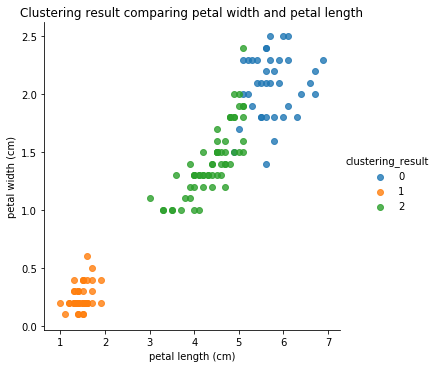

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.lmplot('petal length (cm)', 'petal width (cm)', data=data, hue='clustering_result', fit_reg=False)
ax = plt.gca()
ax.set_title('Clustering result comparing petal width and petal length')
plt.show()

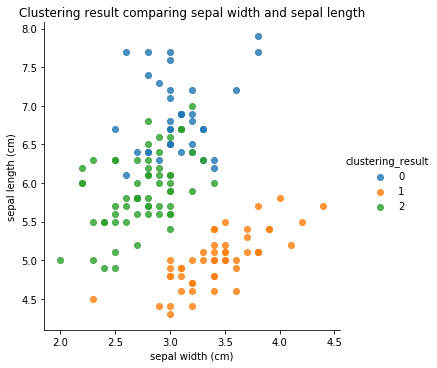

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.lmplot('sepal width (cm)', 'sepal length (cm)', data=data, hue='clustering_result', fit_reg=False)
ax = plt.gca()
ax.set_title('Clustering result comparing sepal width and sepal length')
plt.show()

In [41]:
iris_X.loc[145].values

array([6.7, 3. , 5.2, 2.3])

In [233]:
def euclidean_dist(point1, point2):
    distance = 0
    dimension = len(point1)
    
    for i in range(dimension):
        distance += (point1[i]-point2[i])**2
        
    return distance ** 0.5

In [234]:
def init_proximity_matrix(data):
    matrix = [[0 for i in range(len(data))] for j in range(len(data))]
    
    for i in range(len(data)):
        for j in range(i, len(data)):
            if (i != j):
                proximity = euclidean_dist(data.loc[i].values, data.loc[j].values)
                matrix[i][j] = proximity
                matrix[j][i] = proximity
    
    return matrix

In [235]:
def init_cluster(n_cluster):
    clusters = []
    
    for i in range(n_cluster):
        clusters.append(str(i))
        
    return clusters

In [236]:
def find_shortest_dist(proximity_matrix):
    min_distance = float("inf")
    result = [0, 1]
    
    for i in range(len(proximity_matrix)):
        for j in range(i, len(proximity_matrix)):
            if (proximity_matrix[i][j] > 0) and (proximity_matrix[i][j] < min_distance):
                min_distance = proximity_matrix[i][j]
                print(min_distance)
                result[0] = i
                result[1] = j
    
    return result

In [237]:
def update_clusters(clusters, cluster1, cluster2):
    updated_clusters = []
    
    for i in range(len(clusters)-1):
        if (i != cluster1):
            if (i >= cluster2):
                updated_clusters.append(clusters[i+1])
            else:
                updated_clusters.append(clusters[i])
        else:
            updated_clusters.append(clusters[cluster1] + "," + clusters[cluster2])
    
    return updated_clusters

In [239]:
def update_proximity_matrix(matrix, cluster1, cluster2, linkage):
    updated_matrix = [[0 for i in range(len(matrix)-1)] for j in range(len(matrix)-1)]

    for i in range(len(updated_matrix)):
        if (i != cluster1):
            idx_i = i
            if (i >= cluster2):
                idx_i += 1

            for j in range(idx_i, len(updated_matrix)):
                if (i != j):
                    if (j != cluster1):
                        if (j >= cluster2):
                            updated_matrix[i][j] = matrix[idx_i][j+1]
                            updated_matrix[j][i] = matrix[idx_i][j+1]
                        else:
                            updated_matrix[i][j] = matrix[idx_i][j]
                            updated_matrix[j][i] = matrix[idx_i][j]
                    else:
                        if (linkage == "single"):
                            updated_matrix[i][j] = min([matrix[idx_i][cluster1], matrix[idx_i][cluster2]])
                            updated_matrix[j][i] = min([matrix[idx_i][cluster1], matrix[idx_i][cluster2]])
                        elif (linkage == "complete"):
                            updated_matrix[i][j] = max([matrix[idx_i][cluster1], matrix[idx_i][cluster2]])
                            updated_matrix[j][i] = max([matrix[idx_i][cluster1], matrix[idx_i][cluster2]])

        else:
            for j in range(i, len(updated_matrix)):
                if (i != j):
                    if (j >= cluster2):
                        if (linkage == "single"):
                            updated_matrix[i][j] = min([matrix[cluster1][j+1], matrix[cluster2][j+1]]) 
                            updated_matrix[j][i] = min([matrix[cluster1][j+1], matrix[cluster2][j+1]]) 
                        elif (linkage == "complete"):
                            updated_matrix[i][j] = max([matrix[cluster1][j+1], matrix[cluster2][j+1]]) 
                            updated_matrix[j][i] = max([matrix[cluster1][j+1], matrix[cluster2][j+1]]) 
                    else:
                        if (linkage == "single"):
                            updated_matrix[i][j] = min([matrix[cluster1][j], matrix[cluster2][j]]) 
                            updated_matrix[j][i] = min([matrix[cluster1][j], matrix[cluster2][j]]) 
                        elif (linkage == "complete"):
                            updated_matrix[i][j] = max([matrix[cluster1][j], matrix[cluster2][j]]) 
                            updated_matrix[j][i] = max([matrix[cluster1][j], matrix[cluster2][j]]) 
                        
    return updated_matrix

In [244]:
def agglomerative(data, cluster, linkage):
    n_cluster = len(data)
    proximity_matrix = init_proximity_matrix(data)
    clusters = init_cluster(n_cluster)
#     n_cluster = 6
#     proximity_matrix = [[0.00, 0.71, 5.66, 3.61, 4.24, 3.20], [0.71, 0.00, 4.95, 2.92, 3.54, 2.50], [5.66, 4.95, 0.00, 2.24, 1.41, 2.50], [3.61, 2.92, 2.24, 0.00, 1.00, 0.50], [4.24, 3.54, 1.41, 1.00, 0.00, 1.12], [3.20, 2.50, 2.50, 0.50, 1.12, 0.00]]
#     clusters = ['a', 'b', 'c', 'd', 'e', 'f']
#     n_cluster = 4
#     proximity_matrix = [[0, 1, 4, 5], [1, 0, 2, 6], [4, 2, 0, 3], [5, 6, 3, 0]]
#     clusters = ['a', 'b', 'c', 'd']
    
    if (len(data) > 1):
        while (n_cluster > cluster):             
            cluster_pair = find_shortest_dist(proximity_matrix)
            print(cluster_pair)
            print(proximity_matrix)
            print(clusters)
            clusters = update_clusters(clusters, cluster_pair[0], cluster_pair[1])  
            proximity_matrix = update_proximity_matrix(proximity_matrix, cluster_pair[0], cluster_pair[1], linkage)

            n_cluster -= 1
    
    return clusters

In [245]:
print(agglomerative(iris_X, 1, "complete"))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




0.4582575694955838
0.4242640687119284
[5, 11]
[[0, 0.6557438524302003, 0.877496438739212, 0.9165151389911682, 1.1090536506409419, 0.6244997998398395, 0.648074069840786, 1.0816653826391966, 1.3228756555322958, 0.7549834435270752, 0.7416198487095663, 0.6244997998398399, 0.7874007874011815, 0.6164414002968976, 1.0295630140987002, 0.469041575982343, 1.4071247279470291, 4.296510211788168, 3.8974350539810154, 3.2015621187164243, 4.183300132670377, 3.5114099732158874, 2.4738633753705965, 2.973213749463701, 2.7910571473905725, 3.340658617698013, 3.277193921634788, 3.809199390948182, 2.694438717061496, 3.7656340767525465, 3.5242020373412193, 3.127299154222378, 3.901281840626232, 2.9916550603303182, 4.235563716909474, 4.272001872658765, 3.5482389998420345, 4.37264222181509, 2.619160170741759, 3.620773398046335, 3.2526911934581184, 5.382378656319155, 4.3069710934716054, 5.426785420486054, 4.793745925682753, 5.166236541235796, 6.338769596696192, 3.6578682316343767, 5.757603668193912, 5.1672042731